In [9]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.utils import draw_path, generate_demonstrations, init_grid_world
from src.deepmaxent_irl_gridword import run_deepmaxent_irl
from src.maxent_irl_gridworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

## Maxent

In [2]:
np.random.seed(0)
BASIC_ARGS = """
--exp_name test
--height 6
--width 6
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)
coor_rates = [
    ((args.height-2, args.width-2), 1.0), 
    ((0, args.width-1), 0.5), 
    ((1, 1), 0.5)
]
init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

test
start positions:  [[4, 5]]


In [3]:
MAXENT_ARGS = """
--exp_name maxent_rand
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.1
--n_iters 100
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, coor_rates, init_start_pos=init_start_pos)

maxent_rand
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
1th trajectories.
s=(4, 5), a=l, r=0.0, s'=(3, 5) -> 
s=(3, 5), a=d, r=0.0, s'=(2, 5) -> 
s=(2, 5), a=d, r=0.0, s'=(1, 5) -> 
s=(1, 5), a=u, r=0.0, s'=(0, 5) -> 
s=(0, 5), a=r, r=0.5, s'=(0, 5) -> 
s=(0, 5), a=r, r=0.5, s'=(0, 5)
[INFO - n_trajs:1] Training MaxEnt IRL


  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[0.0918 0.0928 0.0929 0.0925 0.0927 1.    ]
 [0.092  0.0921 0.0923 0.0924 0.092  0.5544]
 [0.0923 0.0926 0.0928 0.0927 0.0919 0.5535]
 [0.0928 0.0922 0.0924 0.0918 0.0921 0.1557]
 [0.0923 0.093  0.0926 0.0923 0.0624 0.    ]
 [0.0922 0.0919 0.0927 0.0919 0.09   0.051 ]]
[INFO - n_trajs:1] Policy evaluation
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[2.4700e-02 4.8000e-03 1.3000e-03 5.0000e-04 2.0000e-04 1.0000e-04]
 [1.5150e-01 4.6300e-02 1.6500e-02 7.1000e-03 2.8000e-03 5.0000e-04]
 [4.9230e-01 2.4700e-01 1.4370e-01 8.8000e-02 4.2700e-02 5.3000e-03]
 [1.6964e+00 1.4281e+00 1.2596e+00 1.0434e+00 6.9610e-01 4.3700e-02]
 [2.5078e+00 2.1518e+00 1.8711e+00 1.4260e+00 6.7540e-01 6.8500e-02]
 [3.1426e+00 2.6684e+00 2.2567e+00 1.6889e+00 7.4730e-01 8.7500e-02]]
[INFO - n_trajs:1] Generating a new demonstrations from [(5, 0)]
2th trajectories.
s=(5, 0), a=r, r=0.0, s'=(5, 0) -> 
s=(5, 0), a=r, r=0.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[0.0926 0.0944 0.0935 0.0934 0.0929 1.    ]
 [0.0918 0.0933 0.0926 0.0935 0.0918 0.5474]
 [0.0934 0.0928 0.0938 0.0943 0.0929 0.5475]
 [0.0943 0.093  0.0943 0.0941 0.0944 0.1547]
 [0.0482 0.078  0.0863 0.0905 0.0631 0.    ]
 [0.1365 0.0859 0.1716 0.2605 0.3722 0.0485]]
[INFO - n_trajs:2] Policy evaluation
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[0.4538 0.1256 0.0326 0.0112 0.0081 0.0096]
 [1.0901 0.4768 0.199  0.0774 0.0324 0.0214]
 [1.7467 0.9281 0.4829 0.2381 0.1161 0.0677]
 [2.8013 2.0878 1.6577 1.3167 0.8908 0.1007]
 [3.6277 3.1567 2.8503 2.2897 1.1814 0.1622]
 [2.5383 1.9017 2.0025 2.2    2.0973 0.6443]]
[INFO - n_trajs:2] Generating a new demonstrations from [(4, 0)]
3th trajectories.
s=(4, 0), a=r, r=0.0, s'=(4, 1) -> 
s=(4, 1), a=r, r=0.0, s'=(3, 1) -> 
s=(3, 1), a=r, r=0.0, s'=(2, 1) -> 
s=(2, 1), a=u, r=0.0, s'=(2, 0) -> 
s=(2, 0), a=u, r=0.0, s'=(1, 0) -> 
s=(1, 0), a=r, r=0.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[1.473e-01 1.447e-01 1.457e-01 1.467e-01 1.466e-01 1.000e+00]
 [5.735e-01 1.455e-01 1.470e-01 1.458e-01 1.450e-01 5.719e-01]
 [5.742e-01 5.716e-01 1.456e-01 1.478e-01 1.453e-01 5.725e-01]
 [9.000e-04 5.438e-01 1.455e-01 1.444e-01 1.477e-01 2.058e-01]
 [0.000e+00 2.565e-01 1.251e-01 1.450e-01 1.179e-01 5.690e-02]
 [2.173e-01 1.448e-01 3.694e-01 4.379e-01 5.037e-01 1.037e-01]]
[INFO - n_trajs:3] Policy evaluation
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[2.2134 2.8349 0.3736 0.0869 0.056  0.0662]
 [3.0114 2.9946 1.6013 0.3932 0.1887 0.1342]
 [3.3675 3.3504 2.3419 0.7506 0.3804 0.2944]
 [2.8062 2.9069 2.2508 2.0462 1.1831 0.2944]
 [2.566  2.2185 3.1324 2.6924 2.4393 0.4523]
 [3.1151 2.8116 2.9891 3.0321 2.5849 2.1672]]
[INFO - n_trajs:3] Generating a new demonstrations from [(2, 0)]
4th trajectories.
s=(2, 0), a=u, r=0.0, s'=(1, 0) -> 
s=(1, 0), a=r, r=0.0, s'=(1, 1) -> 
s=(1, 1), a=s, r=0.5,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[0.1522 0.1527 0.1536 0.152  0.1524 0.8158]
 [0.5619 1.     0.1272 0.1527 0.1519 0.4831]
 [0.4104 0.3929 0.1468 0.1521 0.1557 0.484 ]
 [0.     0.452  0.1511 0.1547 0.1533 0.2053]
 [0.025  0.2466 0.1391 0.1541 0.13   0.0813]
 [0.2326 0.1729 0.4017 0.4444 0.4504 0.1187]]
[INFO - n_trajs:4] Policy evaluation
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[0.5907 0.4425 1.0982 0.4677 0.1677 0.1787]
 [0.6588 0.5615 0.4476 0.5941 0.4523 0.3381]
 [1.0715 0.4728 0.6435 1.3006 0.7909 0.6259]
 [1.2343 0.5289 0.8575 1.7765 1.5686 0.6036]
 [1.5603 0.6228 2.0153 3.0328 2.807  0.8342]
 [2.5094 1.6405 3.3743 3.5353 3.175  2.4965]]
[INFO - n_trajs:4] Generating a new demonstrations from [(5, 3)]
5th trajectories.
s=(5, 3), a=r, r=0.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[0.1535 0.1496 0.1529 0.1521 0.1517 0.7856]
 [0.5501 1.     0.1316 0.1505 0.1535 0.468 ]
 [0.392  0.3754 0.1454 0.1536 0.154  0.4689]
 [0.     0.4313 0.1478 0.1524 0.1523 0.3815]
 [0.0203 0.2491 0.1357 0.1204 0.6693 0.0659]
 [0.2066 0.1724 0.351  0.3119 0.4917 0.0778]]
[INFO - n_trajs:5] Policy evaluation
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[0.94   0.6858 1.3592 0.9277 0.3274 0.3322]
 [0.9916 0.8777 0.684  0.8801 0.7889 0.6038]
 [1.4225 0.7392 0.9973 1.8276 1.3453 1.1   ]
 [1.5332 0.8009 1.3093 2.9905 2.6289 1.5162]
 [1.8782 0.924  2.6039 2.4001 2.8747 2.5297]
 [2.8206 2.0519 3.1572 2.8435 2.9371 2.3897]]
[INFO - n_trajs:5] Generating a new demonstrations from [(5, 2)]
6th trajectories.
s=(5, 2), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[0.1475 0.1489 0.1488 0.148  0.1477 0.7578]
 [0.5358 1.     0.1254 0.1466 0.1455 0.4512]
 [0.3716 0.3548 0.1424 0.1448 0.1449 0.451 ]
 [0.     0.4143 0.1437 0.1447 0.1478 0.4266]
 [0.0192 0.2414 0.1066 0.0942 0.974  0.0512]
 [0.1882 0.129  0.1896 0.4624 0.5676 0.0661]]
[INFO - n_trajs:6] Policy evaluation
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[1.3052 0.9499 1.6278 1.4515 0.5371 0.5215]
 [1.3198 1.2053 0.9381 1.2417 1.2248 0.937 ]
 [1.7486 1.0232 1.3726 2.6265 2.2108 1.9335]
 [1.8386 1.1177 1.8535 1.8884 1.2198 2.8   ]
 [2.2286 1.3143 1.5324 1.1688 1.4158 1.1476]
 [2.892  2.1432 1.5286 1.7615 1.6167 1.3537]]
[INFO - n_trajs:6] Generating a new demonstrations from [(5, 0)]
7th trajectories.
s=(5, 0), a=r, r=0.0, s'=(5, 1) -> 
s=(5, 1), a=r, r=0.0, s'=(5, 2) -> 
s=(5, 2), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(5, 5) -> 
s=(5, 5), a=u, r=0.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[0.161  0.1651 0.1629 0.1621 0.1651 0.7368]
 [0.5311 0.9912 0.1424 0.1626 0.1644 0.4497]
 [0.3652 0.3523 0.1553 0.1618 0.1638 0.4498]
 [0.0206 0.4088 0.161  0.1636 0.1649 0.4238]
 [0.     0.2379 0.1152 0.1067 1.     0.0741]
 [0.1134 0.1256 0.2235 0.5071 0.6328 0.3506]]
[INFO - n_trajs:7] Policy evaluation
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[1.6515 1.2212 1.9004 1.881  0.7635 0.7197]
 [1.635  1.5295 1.1966 1.6208 1.6362 1.2689]
 [2.0447 1.3095 1.7208 3.0261 2.3869 2.5213]
 [2.1149 1.4429 2.4487 2.1932 1.5874 2.9758]
 [2.4966 1.7866 1.9008 1.6054 1.9708 1.6081]
 [2.5999 2.0745 1.8164 2.1953 2.2512 2.0914]]
[INFO - n_trajs:7] Generating a new demonstrations from [(2, 3)]
8th trajectories.
s=(2, 3), a=d, r=0.0, s'=(2, 3) -> 
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[0.1332 0.1366 0.1351 0.1317 0.1342 0.6139]
 [0.446  0.8495 0.1213 0.1104 0.1311 0.3743]
 [0.2988 0.2901 0.0979 0.3241 0.0749 0.3659]
 [0.0204 0.3381 0.1297 0.2259 0.2383 0.3443]
 [0.     0.1948 0.0736 0.036  1.     0.0454]
 [0.0849 0.0908 0.1596 0.4311 0.5562 0.2986]]
[INFO - n_trajs:8] Policy evaluation
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[1.9743 1.4984 2.1849 2.383  1.0492 0.9675]
 [1.9372 1.853  1.4873 2.348  2.1869 1.7128]
 [2.3256 1.6108 2.1948 2.669  1.4305 2.9017]
 [2.4182 1.83   2.5834 1.7511 1.146  2.1732]
 [2.8548 2.3016 1.3867 1.1275 1.4078 1.1409]
 [2.457  1.7668 1.4111 1.6604 1.6097 1.6268]]
[INFO - n_trajs:8] Generating a new demonstrations from [(2, 5)]
9th trajectories.
s=(2, 5), a=d, r=0.0, s'=(3, 5) -> 
s=(3, 5), a=d, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(2, 4) -> 
s=(2, 4), a=d, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[0.12   0.117  0.1197 0.1193 0.1165 0.5468]
 [0.3984 0.7707 0.1067 0.1011 0.1161 0.3091]
 [0.2608 0.2541 0.0967 0.2941 0.1938 0.2624]
 [0.0253 0.2984 0.11   0.2121 0.553  0.3339]
 [0.     0.1642 0.036  0.0311 1.     0.0214]
 [0.0701 0.0712 0.1273 0.3874 0.5178 0.2683]]
[INFO - n_trajs:9] Policy evaluation
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[2.2611 1.7665 2.4832 2.8953 1.4311 1.2773]
 [2.2186 2.161  1.7792 2.6813 1.8093 2.3011]
 [2.5965 1.9319 2.7806 2.0825 1.1938 2.1461]
 [2.7548 2.3176 1.5171 1.2634 1.3515 1.4949]
 [3.0573 2.5028 1.2125 1.1631 1.5614 1.1904]
 [2.3736 1.639  1.3166 1.5677 1.5471 1.5619]]
[INFO - n_trajs:9] Generating a new demonstrations from [(4, 0)]
10th trajectories.
s=(4, 0), a=r, r=0.0, s'=(4, 0) -> 
s=(4, 0), a=r, r=0.0, s'=(4, 1) -> 
s=(4, 1), a=r, r=0.0, s'=(4, 2) -> 
s=(4, 2), a=r, r=0.0, s'=(4, 3) -> 
s=(4, 3), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.1294 0.1259 0.1255 0.1236 0.1263 0.5625]
 [0.4116 0.805  0.1141 0.1072 0.1237 0.3151]
 [0.2654 0.2606 0.1044 0.2996 0.2044 0.2666]
 [0.     0.2978 0.1172 0.2208 0.5726 0.3479]
 [0.0998 0.1903 0.1357 0.1544 1.     0.0241]
 [0.0453 0.0712 0.127  0.5183 0.5487 0.2766]]
[INFO - n_trajs:10] Policy evaluation


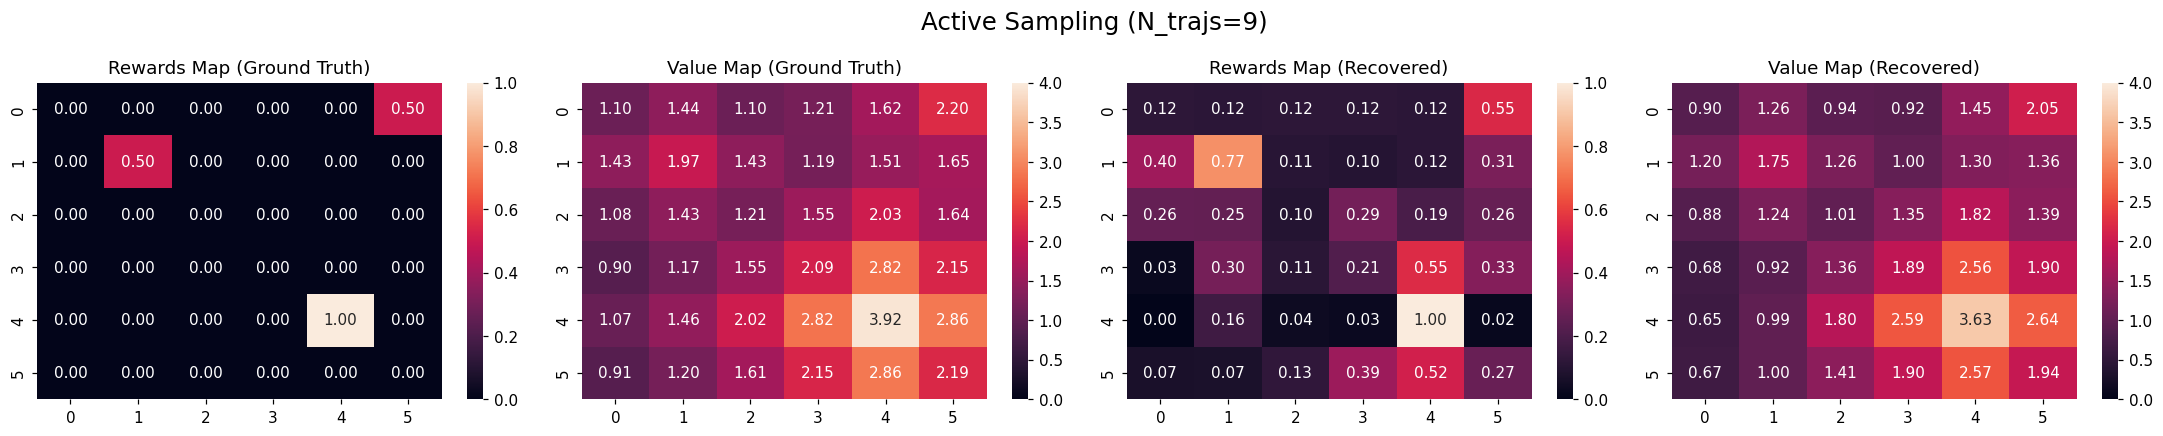

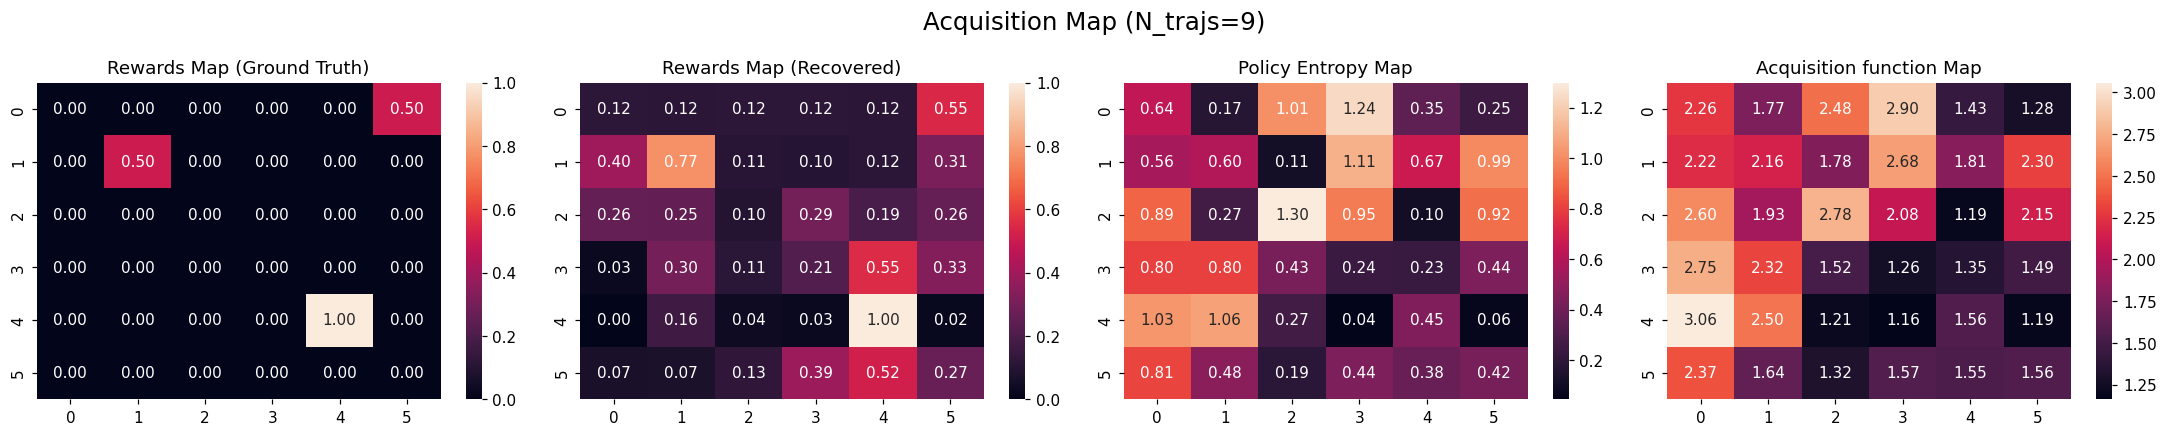

In [4]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [28]:
init_start_pos

[[4, 5]]

In [36]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.01
--n_iters 20
--alpha 0.5
--n_query 1
--r_max 1
--error 0.01
--grad_clip 50.0
--weight_decay 10.0
--hiddens 512 256
--device cuda
--active
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.1595 0.3803 0.4669 0.3737 0.4735 0.1884]
 [0.3423 0.246  0.3896 0.3966 0.     0.2292]
 [0.4377 0.4685 0.2809 0.2397 0.297  0.3285]
 [0.3367 0.5959 0.3855 0.6125 0.5235 0.4203]
 [0.3649 0.5498 0.2409 0.3453 1.     0.4529]
 [0.2106 0.5319 0.2659 0.3213 0.3631 0.3347]]
[INFO - n_trajs:10] Policy evaluation


In [37]:
history_deepmaxent_active[9]['policy'].argmax(axis=1).reshape(6, 6, order='F')

array([[2, 1, 0, 0, 0, 2],
       [1, 1, 3, 3, 0, 3],
       [3, 1, 0, 2, 2, 3],
       [1, 1, 0, 0, 2, 1],
       [3, 0, 0, 0, 4, 1],
       [3, 0, 0, 0, 3, 1]], dtype=int64)

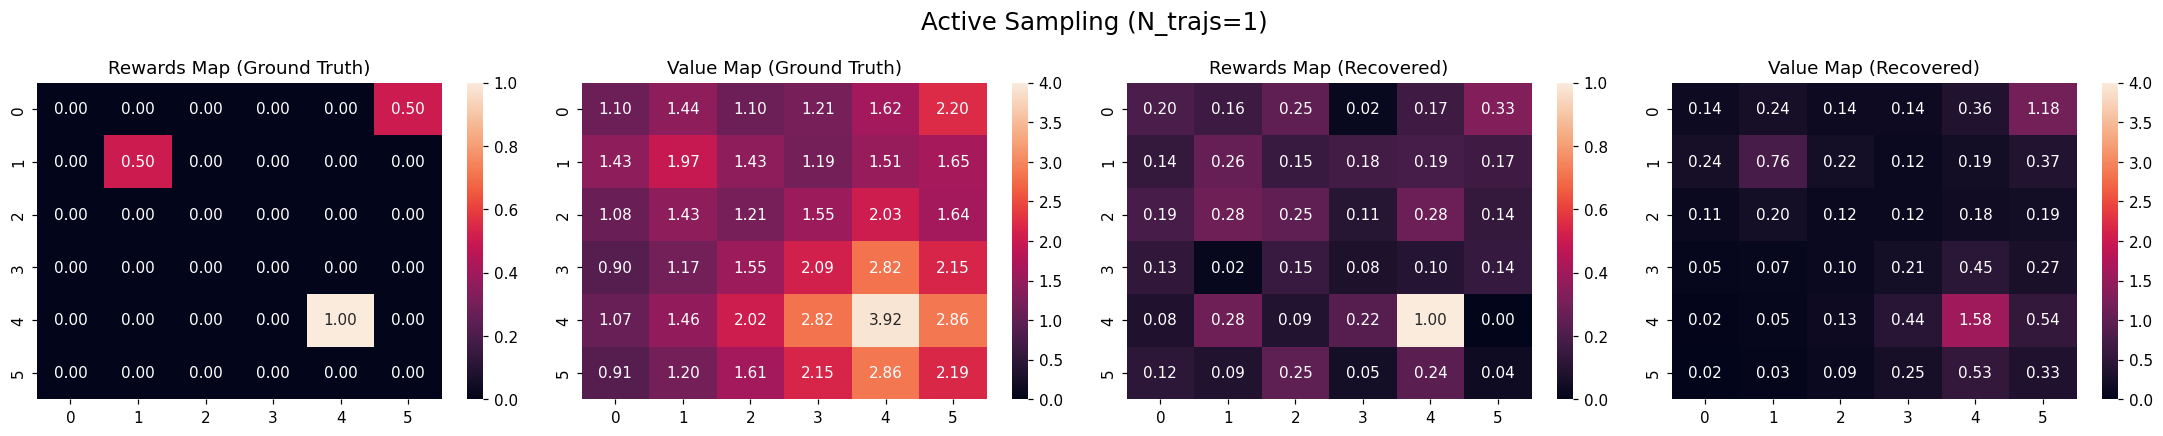

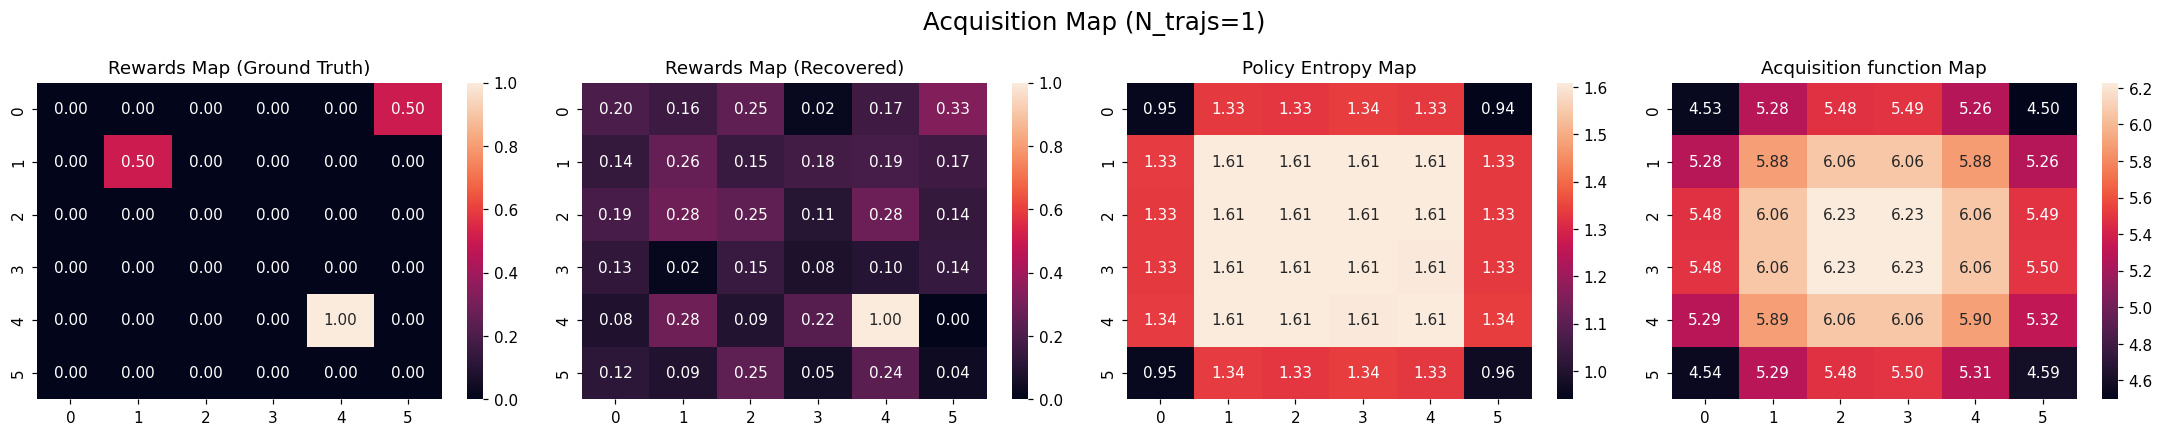

In [39]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 1
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)